In [1]:
#imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
titanic = sns.load_dataset("titanic")

titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [3]:
titanic.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [4]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

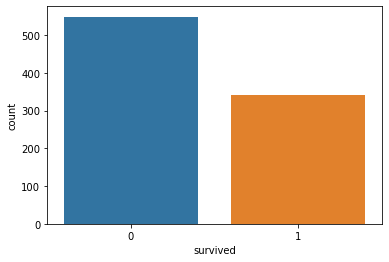

In [5]:
sns.countplot(titanic['survived'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

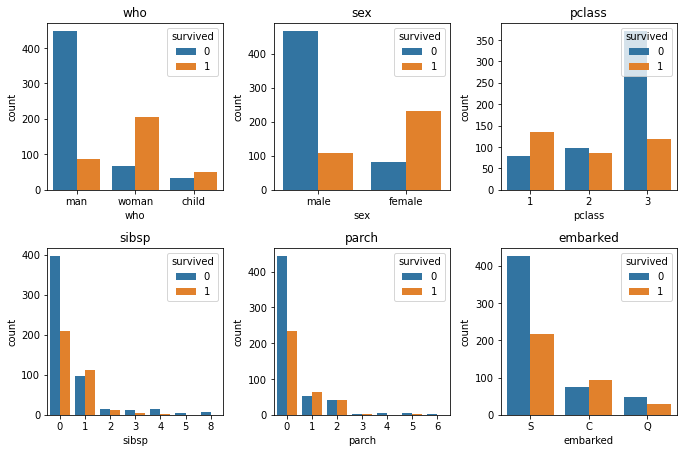

In [6]:
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']
n_rows = 2
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows * 3.2)) 
for r in range(0, n_rows):
    for c in range(0, n_cols):
        
        i = r*n_cols + c
        ax = axs[r][c]
        sns.countplot(titanic[cols[i]], hue=titanic['survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived', loc='upper right')
        
plt.tight_layout()

In [7]:
titanic.groupby('sex')[['survived']].mean()

survived
sex             
female  0.742038
male    0.188908

<AxesSubplot:xlabel='sex'>

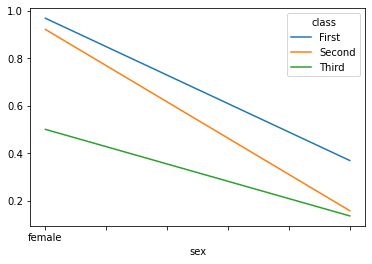

In [8]:
titanic.pivot_table('survived', index='sex', columns='class').plot()

In [9]:
titanic.pivot_table('survived', index='sex', columns='class')

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='class', ylabel='survived'>

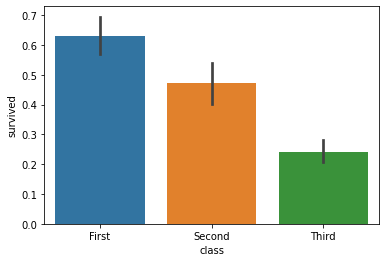

In [10]:
sns.barplot(x='class', y='survived', data=titanic)

In [11]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

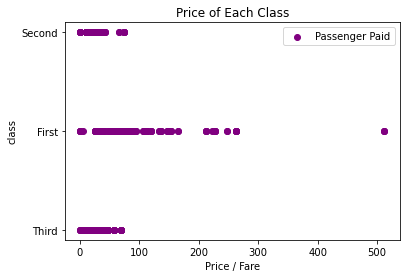

In [12]:
plt.scatter(titanic['fare'], titanic['class'], color= 'purple', label='Passenger Paid')
plt.ylabel('class')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [13]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [15]:
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'alone', 'adult_male'], axis=1)

titanic = titanic.dropna( subset = ['embarked', 'age'])

In [16]:
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
885         0       3  female  39.0      0      5  29.1250        Q
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[712 rows x 8 columns]

In [17]:
titanic.shape

(712, 8)

In [18]:
#Look at dtypes
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [19]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[:, 2].values)
titanic.iloc[:, 7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)

In [21]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [22]:
titanic

survived  pclass  sex   age  sibsp  parch     fare  embarked
0           0       3    1  22.0      1      0   7.2500         2
1           1       1    0  38.0      1      0  71.2833         0
2           1       3    0  26.0      0      0   7.9250         2
3           1       1    0  35.0      1      0  53.1000         2
4           0       3    1  35.0      0      0   8.0500         2
..        ...     ...  ...   ...    ...    ...      ...       ...
885         0       3    0  39.0      0      5  29.1250         1
886         0       2    1  27.0      0      0  13.0000         2
887         1       1    0  19.0      0      0  30.0000         2
889         1       1    1  26.0      0      0  30.0000         0
890         0       3    1  32.0      0      0   7.7500         1

[712 rows x 8 columns]

In [23]:
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [24]:
#Split into X: IV and Y: DV
X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values

In [25]:
#split the data set into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_test)

[[  3.       0.      28.     ...   1.      14.4      2.    ]
 [  2.       1.      30.     ...   0.      13.       2.    ]
 [  1.       1.       0.92   ...   2.     151.55     2.    ]
 ...
 [  1.       1.      54.     ...   1.      77.2875   2.    ]
 [  3.       1.      38.     ...   0.       8.6625   2.    ]
 [  2.       0.      24.     ...   2.      65.       2.    ]]


In [26]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

In [27]:
#Create a function with ml models
def models(X_train, Y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #Use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p=2)
    knn.fit(X_train, Y_train)
    
    #Use SVC |linear kernel|
    from sklearn.svm import SVC
    svc_lin = SVC(kernel="linear", random_state=0)
    svc_lin.fit(X_train, Y_train)
    
    #Use SVC|RBF kernel|
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel="rbf", random_state=0)
    svc_rbf.fit(X_train, Y_train)
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier 
    tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
    tree.fit(X_train, Y_train)
    
    #Use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = "entropy", random_state=0)
    forest.fit(X_train, Y_train)
    
    #Print Training Accuracy
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('[1]K Neighbors Training Accuracy: ', knn.score(X_train, Y_train))
    print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
    print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))
    print("")
    print("Testing Accuracy")
    #Testing Accuracy
    print('[0]Logistic Regression Testing Accuracy: ', log.score(X_test, Y_test))
    print('[1]K Neighbors Testing Accuracy: ', knn.score(X_test, Y_test))
    print('[2]SVC Linear Testing Accuracy: ', svc_lin.score(X_test, Y_test))
    print('[3]SVC RBF Testing Accuracy: ', svc_rbf.score(X_test, Y_test))
    print('[4]Gaussian NB Testing Accuracy: ', gauss.score(X_test, Y_test))
    print('[5]Decision Tree Testing Accuracy: ', tree.score(X_test, Y_test))
    print('[6]Random Forest Testing Accuracy: ', forest.score(X_test, Y_test))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [28]:
#Get and Train all models
model = models(X_train, Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0]Logistic Regression Training Accuracy:  0.8031634446397188
[1]K Neighbors Training Accuracy:  0.789103690685413
[2]SVC Linear Training Accuracy:  0.7768014059753954
[3]SVC RBF Training Accuracy:  0.6854130052724078
[4]Gaussian NB Training Accuracy:  0.8031634446397188
[5]Decision Tree Training Accuracy:  0.9929701230228472
[6]Random Forest Training Accuracy:  0.9753954305799648

Testing Accuracy
[0]Logistic Regression Testing Accuracy:  0.8181818181818182
[1]K Neighbors Testing Accuracy:  0.6643356643356644
[2]SVC Linear Testing Accuracy:  0.7902097902097902
[3]SVC RBF Testing Accuracy:  0.6363636363636364
[4]Gaussian NB Testing Accuracy:  0.7482517482517482
[5]Decision Tree Testing Accuracy:  0.7762237762237763
[6]Random Forest Testing Accuracy:  0.8041958041958042


In [29]:
model[3].score(X_test, Y_test)

0.6363636363636364

In [30]:
print(X_test)

[[  3.       0.      28.     ...   1.      14.4      2.    ]
 [  2.       1.      30.     ...   0.      13.       2.    ]
 [  1.       1.       0.92   ...   2.     151.55     2.    ]
 ...
 [  1.       1.      54.     ...   1.      77.2875   2.    ]
 [  3.       1.      38.     ...   0.       8.6625   2.    ]
 [  2.       0.      24.     ...   2.      65.       2.    ]]


In [31]:
model[3].predict(X_test)
print(X_test)

[[  3.       0.      28.     ...   1.      14.4      2.    ]
 [  2.       1.      30.     ...   0.      13.       2.    ]
 [  1.       1.       0.92   ...   2.     151.55     2.    ]
 ...
 [  1.       1.      54.     ...   1.      77.2875   2.    ]
 [  3.       1.      38.     ...   0.       8.6625   2.    ]
 [  2.       0.      24.     ...   2.      65.       2.    ]]


In [32]:
print(Y_test)

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [33]:
Xnew = [[3, 1, 22.0, 1, 0, 7.2500, 2]]
# make a prediction
ynew = model[6].predict(Xnew)
print(ynew)

[0]


In [34]:
Xnew = [[3, 1, 22.0, 1, 0, 7.2500, 2]]
# make a prediction
ynew = model[6].predict(Xnew)
print(ynew)

[0]


In [38]:
Xnew = [[2, 0, 26.0, 0, 0, 30.0000, 0]]
# make a prediction
ynew = model[6].predict(Xnew)
print(ynew)

[1]
